# Diabetes Hackathon Two Project
The first hackathon project consisted of just learning how to organize the data and become familiar with folium and different plotly scatter plots/maps. For this project, it was the intention to progress and to learn how to use choropleth maps and how to use folium circles. Therefore, the goal for this project is to successful use a choropleth map from folium and to use the data from the first hackathon project, and potentionally more, to see the diabetes rate throughout different counties in the state of Arizona and maybe even other states in the Southwest.

In [2]:
import numpy as np 
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly_express as px 
import folium as fm
from folium.plugins import FastMarkerCluster # In order to add map markers
import json 
import plotly as py
import plotly.graph_objs as go
import geopandas as gpd
import hypertools as hyp 

%matplotlib inline

/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/hypertools/plot/__init__.py:10: UserWarning:

Could not switch backend to TkAgg.  This may impact performance of the plotting functions.

/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



In [3]:
#Load in Datasets 
#Gathered from https://gis.cdc.gov/grasp/diabetes/DiabetesAtlas.html and
#http://catalog.civicdashboards.com/en/dataset/arizona-counties-polygon/resource/70d647e4-b040-4bac-8f11-ed1b1677a477

new_d = pd.read_csv('DiabetesAtlasCountyData1.csv')
reserve ='Reservations.json'
alld = pd.read_csv('DiabetesAtlasNationalData2016.csv')

# Data Cleanup 
There is no data to clean up as all the tables look clean and contain numbers.

In [4]:
new_d.head()

County  CountyFIPS  Percentage  Lower Limit   Upper Limit
0    Apache County, AZ        4001        14.2         12.2          16.4
1   Cochise County, AZ        4003         8.7          7.6           9.9
2  Coconino County, AZ        4005         7.8          6.5           9.3
3      Gila County, AZ        4007        10.0          8.5          11.8
4    Graham County, AZ        4009        10.8          8.7          13.3

In [5]:
new_d.columns

Index(['County', 'CountyFIPS', 'Percentage', 'Lower Limit', ' Upper Limit'], dtype='object')

In [6]:
alld.head(50)

Name  Percentage  Lower Limit   Upper Limit
0                Alabama        13.2         12.2          14.2
1                 Alaska         7.7          6.5           9.2
2                Arizona         9.7          9.0          10.5
3               Arkansas        12.1         10.8          13.5
4             California         9.7          9.0          10.4
5               Colorado         6.2          5.8           6.6
6            Connecticut         8.5          7.9           9.1
7               Delaware         9.1          8.1          10.2
8   District of Columbia         8.4          7.6           9.3
9                Florida         9.8          9.2          10.4
10               Georgia        11.4         10.5          12.4
11                Hawaii         9.5          8.7          10.4
12                 Idaho         8.1          7.3           9.0
13              Illinois         9.5          8.7          10.5
14               Indiana        10.4          9.8          11.1
15                  Iowa         8.1          7.5           8.8
16                Kansas         8.5          8.0           9.0
17              Kentucky        11.8         10.9          12.7
18             Louisiana        11.1         10.1          12.2
19                 Maine         8.5          7.8           9.2
20              Maryland         9.8          9.2          10.4
21         Massachusetts         8.3          7.6           9.0
22              Michigan         9.8          9.2          10.4
23             Minnesota         7.6          7.1           8.0
24           Mississippi        12.4         11.4          13.5
25              Missouri        10.2          9.4          11.2
26               Montana         6.9          6.2           7.7
27              Nebraska         8.0          7.5           8.6
28                Nevada        10.1          9.1          11.3
29         New Hampshire         7.7          7.0           8.5
30            New Jersey         8.1          7.3           8.9
31            New Mexico        10.4          9.4          11.4
32              New York         9.4          8.9          10.0
33        North Carolina        10.1          9.3          10.9
34          North Dakota         8.2          7.4           9.0
35                  Ohio         9.7          9.0          10.3
36              Oklahoma        10.9         10.1          11.8
37                Oregon         8.4          7.6           9.2
38          Pennsylvania         9.6          8.8          10.4
39          Rhode Island         8.6          7.8           9.5
40        South Carolina        11.5         10.8          12.2
41          South Dakota         6.9          6.1           7.8
42             Tennessee        11.2         10.3          12.1
43                 Texas        10.9          9.9          11.9
44                  Utah         7.7          7.1           8.3
45               Vermont         7.3          6.5           8.1
46              Virginia         9.6          8.9          10.2
47            Washington         8.6          8.1           9.1
48         West Virginia        12.7         11.9          13.5
49             Wisconsin         8.6          7.7           9.5

In [7]:
alld.columns

Index(['Name', 'Percentage', 'Lower Limit', ' Upper Limit'], dtype='object')

# Data Visualization 
I want to recreate a choropleth map as well using both folium and plotly. Additionally, I hope to incorporate the lower limit and upper limit data as well. 

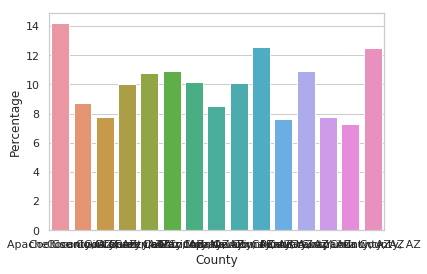

In [8]:
#Bar Graph for 2016 for Arizona Counties
sns.set(style="whitegrid")
a = sns.barplot(x="County", y="Percentage",data=new_d)

# Issue with Bar graph 
One issue with this bar graph is that the color scheme for one is just random - it does not go with high or low percentage. But it looks pretty. 
A second issue with this bar graph is that I don't know how to change the x labels of the states (ex. Arizona --> AZ). I tried to mess around with this but I keep getting errors and I am unsure of how to change the names in dataset. I know this can be done tho. 

In [9]:
AZ_dataframe = pd.read_json(AZ)

NameError: name 'AZ' is not defined

In [ ]:
AZ_dataframe.head()

In [12]:
AZ_dataframe.loc[0]['features']

NameError: name 'AZ_dataframe' is not defined

In [11]:
#Choropleth Map for 2016

m = fm.Map(location=[34.048927,-111.093735], zoom_start=6)

AZ = 'AZ_counties.json'
Count = new_d

chor = fm.features.Choropleth(
    geo_data=AZ,
    data=Count,
    name='choropleth',
    columns=['County', 'Percentage'],
    key_on='feature.properties.name',
    fill_color='PuBu', fill_opacity=1, line_opacity=0.7,
    legend_name='Diabetes Rate (%)'
).add_to(m)
fm.LayerControl().add_to(m)


m

# Now that I have learned how to FINALLY do a choropleth map, I decided to look at diabetes rates across the country.  

In [13]:
states_dataframe = pd.read_json('US_States.json')

In [14]:
states_dataframe.shape

(52, 2)

In [15]:
m = fm.Map(location=[34.048927,-111.093735], zoom_start=4)

allstates = 'US_States.json'
best = alld


chor = fm.features.Choropleth(
    geo_data=allstates, #states_dataframe,
    data=best,
    name='choropleth',
    columns=['Name', 'Percentage'],
    key_on='feature.properties.NAME',
    fill_color='PuBu', fill_opacity=0.5, line_opacity=0.7,
    legend_name='Diabetes Rate for 2016(%)'
).add_to(m)
fm.LayerControl().add_to(m)

m

#Issues with Choropleth Map for all US states 
1. Describe (in plain English) what you were trying to do
    - I was trying to create a choropleth map of all the US states that would show all the diabetes rates for the year of 2016. It would have colored all the states with the darkest being the highest rate of diabetes. An example is in this link https://gis.cdc.gov/grasp/diabetes/DiabetesAtlas.html
2. Describe how you tried to solve the task
    - I tried to solve this task by looking up tutorials on Google and through other websites. I was able to get the state of AZ working, so I thought it would be the same but for some reason it is not coloring the states the way I want it to. 
3. Describe what you thought would happen when you tried solving the task in that way
    - I thought that it would color all the states according to the percentage of diabetes rates for the US. 
4. Describe what actually happened
    - the US map appears, however, the coloring is off. So, the color of the whole US is black or dark blue. 
5. Describe what you did to help get yourself unstuck (e.g. asked a classmate, met with the course instructor, posted questions to Slack, searched on Google or Stack Exchange, read a book, watched a tutorial, etc.)
    - Athina was able to help me with the AZ map, but I tried to do this by myself. I used tutorials online and even tried to use plotly instead of folium. I also tried looking at the tutorials again on Slack that were recommended to me last time. 
6. Estimate how much time you spent working on that part of the assignment (rounded to the nearest hour)
    - Probably 2-3 hours total for this part of the assignment. The whole assignment took about 4 hours. 


In [11]:
#Scatterplot for Diabetes in US in 2016
px.scatter(alld, x="Name", y="Percentage")

# Findings 
- The first interesting finding from this set of data was that I found out that Apache County, which is the county I live in, has the highest rate of diabetes for adults aged 20 and older.
- Additionally, although you cannot see it, the second map shows that the state of Alabama has the highest rate of diabetes for adults aged 20 and older in the United States. The interesting thing about this is that I went in believing that states, such as AZ, would have areas of high diabetes in areas where there is a high population of Native Americans, however, Alabama proved this to be wrong as they only have 1 federally recognized tribe where AZ has 22 federally recognized tribes. 

# Future Projects on Diabetes 
- although there is comprehensive data on diabetes rates in the US and for all state counties, I still did not find comprehensive data on just Native Americans. The reason why I would have like to see statistics on just federally recognized tribes was because I wanted to see which reservations had the highest rates and which had the lowest becaue maybe if something is working for one tribe to bring their diabetes rates down, we could share that information between tribes and help each other out. 